In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [3]:
#Convert a collection of text documents to a matrix of token counts. 
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

#Naive Bayes classifier for multivariate Bernoulli models.
from sklearn.naive_bayes import BernoulliNB

#NLTK is a toolkit build for working with NLP in Python
import nltk

#Stop words are words that are so common they are basically ignored by typical tokenizers.
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
data=pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Preparation, Tokenization, Stopwords Removal and Stemming

In [8]:
import re
stemmer = nltk.SnowballStemmer('english')


In [9]:
from nltk.corpus import stopwords
import string 
stopword = set(stopwords.words('english'))

### Our textual dataset needs preparation before being used for any problem based on NLP. Here we will perform:

* Remove links and all the special characters from the review column.
* Tokenize and remove the stopwords from the review column.
* Stem the words in the review column.

In [11]:
def clean(text):
    text = str(text).lower()
#sub() function in Regular Expression taht is used to replace occurrences of a particular sub-string with another sub-string.
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)
    

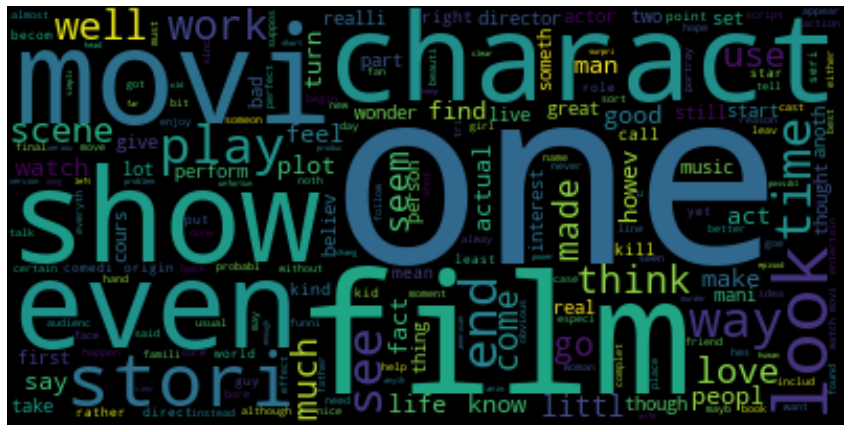

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = ' '.join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color ='black').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
            

## Text Vectorization
#### Text Vectorization means to transform all the text tokens into numerical vectors.


In [21]:
x = np.array(data['review'])
y = np.array(data['sentiment'])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)


## Text Classification
#### The final step in the process of NLP is to classify or cluster texts. 

In [22]:
from sklearn.linear_model import PassiveAggressiveClassifier
model = PassiveAggressiveClassifier()
model.fit(X_train, y_train)


PassiveAggressiveClassifier()

#### We used the dataset to train a sentiment classification model contains movie reviews. 
#### So let’s test the model by giving an input of movie review:

In [25]:
user = input("Enter your movie review")

data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter your movie review It was the best movie I have ever seen!!


['positive']
